<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/Hands_on_4_Nan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on: Bigger Data

In this hands-on notebook, we'll take a look at:
* Pandas indexing and its role
* Dask dataframes (in limited memory)
* Apache Spark on a cluster!

Note that you have been given AWSEducate accounts, and that Homework 3 will ask
you to use them to program using Spark.  The second part of the demo will
show you how this is done, but you will not be able to run this part of the demo until you have learned how to set up your own cluster.  

In [ ]:
import pandas as pd
import numpy as np

# JSON parsing
import json


In [ ]:
!wget -nc https://storage.googleapis.com/penn-cis5450/linkedin_small.json

--2023-02-09 21:42:42--  https://storage.googleapis.com/penn-cis5450/linkedin_small.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 74.125.23.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480593111 (458M) [application/json]
Saving to: ‘linkedin_small.json’

linkedin_small.json 100%[===================>] 458.33M  26.9MB/s    in 17s     

2023-02-09 21:42:58 (27.7 MB/s) - ‘linkedin_small.json’ saved [480593111/480593111]



In [ ]:
%%time
# 100K records from linkedin
linked_in = open('/content/linkedin_small.json')
    
people = []

for line in linked_in:
    person = json.loads(line)
    people.append(person)
    
people_df = pd.DataFrame(people)
print ("%d records"%len(people_df))

people_df

100000 records
CPU times: user 10.2 s, sys: 1.87 s, total: 12 s
Wall time: 12.4 s


,_id,name,locality,skills,industry,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"[{'start': '2008', 'major': 'Economics', 'end'...","{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"[{'org': 'Johnson and Johnson', 'title': 'Seni...","Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN
2,in-00006,"{'family_name': 'Douglas', 'given_name': 'Shawn'}","San Francisco, California","[DNA, Nanotechnology, Molecular Biology, Softw...",Research,I am interested in inventing new methods to co...,http://www.linkedin.com/in/00006,[{'url': 'http://www.linkedin.com/pub/george-c...,"[{'major': 'Biophysics', 'end': '2009', 'name'...",NaN,"<dl id=""overview""><dt id=""overview-summary-cur...",0.0,"[{'org': 'UCSF', 'title': 'Assistant Professor...",NaN,[{'from': 'Wyss Institute for Biologically Ins...,"personal genomics, nanotechnology","{'BIOMOD': ['http://biomod.net/'], 'Company We...",NaN
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,NaN,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,"[{'org': '<Online Recruiting Company>', 'desc'...",NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN
4,in-000vijaychauhan,"{'family_name': 'Chauhan, PMP', 'given_name': ...","Chennai Area, India","[Program Management, French, Avionics, Embedde...",Aviation & Aerospace,"Experience in Avionics Systems, Embedded Syste...",http://in.linkedin.com/in/000vijaychauhan,[{'url': 'http://in.linkedin.com/in/sandeeprag...,"[{'start': '1988', 'end': '1989', 'name': 'Eco...",{'member': 'Member of Project Management Insti...,NaN,NaN,NaN,NaN,NaN,"Literature, Philosophy, Music",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,in-dorothyballarini,"{'family_name': 'Ballarini', 'given_name': 'Do...","London, United Kingdom","[Zbrush, 3D Studio Max, Concept Design, Charac...",Motion Pictures and Film,I have 10 years of experience working with the...,http://uk.linkedin.com/in/dorothyballarini,[{'url': 'http://es.linkedin.com/pub/rebeca-pu...,"[{'start': '2007', 'major': 'Design', 'end': '...","{'affilition': ['3D Animation, VFX & Games', '...",NaN,6.0,"[{'org': 'ZOO', 'title': 'Freelancer 3D artist...",NaN,[{'from': 'Universidade Federal do Rio Grande ...,"Arts, Computer Graphics, Cinema, Video Games",NaN,NaN
99996,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot...","Houston, Texas Area","[Internal Controls, Revenue Recognition, Sarba...",Oil & Energy,• Results driven finance leader and business p...,http://www.linkedin.com/in/dorothybarnettgrimes,[{'url': 'http://www.linkedin.com/pub/ken-greg...,"[{'major': 'Business', 'name': 'Santa Clara Un...",NaN,NaN,25.0,"[{'org': 'Spectrum ASA', 'title': 'Multi-Clien...",NaN,"[{'from': 'TanThap Inc and Digitan Systems', '...",NaN,NaN,[Certified Public Accountant - State of Texas]
99997,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all ph

## 1.1 Indices


Pandas differs from most other models of relations, in that it has a built-in notion of *indices*.  These are not part of the data, but rather they are special metadata.

**It is considered good data design to put all meaningful fields into the data, so you should not rely too heavily on Pandas indices for semantics.**

By default, indices are used to help look up data -- in a way that is similar to selection but is more efficient:  see the `iloc` and `loc` commands.

### 1.1. Integer indices and iloc

There are two ways of using the index.

If it's an `integer` then you can use `.iloc`.

In [ ]:
# TODO 1:  Return the 4th entry of people_df using .iloc
people_df.iloc[3, :]

_id                                               in-000montgomery
name             {'family_name': 'Kilimann', 'given_name': 'Edr...
locality                                    San Francisco Bay Area
skills                                                         NaN
industry                       Information Technology and Services
summary          OBJECTIVE<Primary> Work on an interesting and ...
url                       http://www.linkedin.com/in/000montgomery
also_view        [{'url': 'http://www.linkedin.com/pub/david-br...
education                                                      NaN
group            {'affilition': ['Big Data, Low Latency', 'Expe...
overview_html                                                  NaN
interval                                                       5.0
experience       [{'org': '<Online Recruiting Company>', 'desc'...
specilities                                                    NaN
events           [{'from': '<Employee Benefits, Administration

In [ ]:
# You can also index along the column dimension, although
# this depends on the ordering and not values!

# TODO 2:  Return the 2nd column of the second entry in people_df
people_df.iloc[1, 1]

{'family_name': 'Forslund', 'given_name': 'Ann'}

In [ ]:
people_df.iloc[row_startIndex : row_endIndex, col_startIndex :col_endIndex]

In [ ]:
# You can do an .iloc using an array as well
row = [1,3,5]
people_df.iloc[row,:]
people_df.iloc[row]
col = [0,1]
people_df.iloc[:, col]

,_id,name
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D..."
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}"
2,in-00006,"{'family_name': 'Douglas', 'given_name': 'Shawn'}"
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr..."
4,in-000vijaychauhan,"{'family_name': 'Chauhan, PMP', 'given_name': ..."
...,...,...
99995,in-dorothyballarini,"{'family_name': 'Ballarini', 'given_name': 'Do..."
99996,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot..."
99997,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro..."
99998,in-dorothyczudziak,"{'family_name': 'Czudziak', 'given_name': 'Dor..."


In [ ]:
len(people_df.columns.values)

18

In [ ]:
boollist = [True for i in range(18)]
boollist

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [ ]:
boollist[0]=False
people_df.iloc[:,boollist]

,name,locality,skills,industry,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
0,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"[{'start': '2008', 'major': 'Economics', 'end'...","{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"[{'org': 'Johnson and Johnson', 'title': 'Seni...","Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN
2,"{'family_name': 'Douglas', 'given_name': 'Shawn'}","San Francisco, California","[DNA, Nanotechnology, Molecular Biology, Softw...",Research,I am interested in inventing new methods to co...,http://www.linkedin.com/in/00006,[{'url': 'http://www.linkedin.com/pub/george-c...,"[{'major': 'Biophysics', 'end': '2009', 'name'...",NaN,"<dl id=""overview""><dt id=""overview-summary-cur...",0.0,"[{'org': 'UCSF', 'title': 'Assistant Professor...",NaN,[{'from': 'Wyss Institute for Biologically Ins...,"personal genomics, nanotechnology","{'BIOMOD': ['http://biomod.net/'], 'Company We...",NaN


### 1.2. Groupby and loc

In [ ]:
people_df

,_id,name,locality,skills,industry,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"[{'start': '2008', 'major': 'Economics', 'end'...","{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"[{'org': 'Johnson and Johnson', 'title': 'Seni...","Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN
2,in-00006,"{'family_name': 'Douglas', 'given_name': 'Shawn'}","San Francisco, California","[DNA, Nanotechnology, Molecular Biology, Softw...",Research,I am interested in inventing new methods to co...,http://www.linkedin.com/in/00006,[{'url': 'http://www.linkedin.com/pub/george-c...,"[{'major': 'Biophysics', 'end': '2009', 'name'...",NaN,"<dl id=""overview""><dt id=""overview-summary-cur...",0.0,"[{'org': 'UCSF', 'title': 'Assistant Professor...",NaN,[{'from': 'Wyss Institute for Biologically Ins...,"personal genomics, nanotechnology","{'BIOMOD': ['http://biomod.net/'], 'Company We...",NaN
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,NaN,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,"[{'org': '<Online Recruiting Company>', 'desc'...",NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN
4,in-000vijaychauhan,"{'family_name': 'Chauhan, PMP', 'given_name': ...","Chennai Area, India","[Program Management, French, Avionics, Embedde...",Aviation & Aerospace,"Experience in Avionics Systems, Embedded Syste...",http://in.linkedin.com/in/000vijaychauhan,[{'url': 'http://in.linkedin.com/in/sandeeprag...,"[{'start': '1988', 'end': '1989', 'name': 'Eco...",{'member': 'Member of Project Management Insti...,NaN,NaN,NaN,NaN,NaN,"Literature, Philosophy, Music",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,in-dorothyballarini,"{'family_name': 'Ballarini', 'given_name': 'Do...","London, United Kingdom","[Zbrush, 3D Studio Max, Concept Design, Charac...",Motion Pictures and Film,I have 10 years of experience working with the...,http://uk.linkedin.com/in/dorothyballarini,[{'url': 'http://es.linkedin.com/pub/rebeca-pu...,"[{'start': '2007', 'major': 'Design', 'end': '...","{'affilition': ['3D Animation, VFX & Games', '...",NaN,6.0,"[{'org': 'ZOO', 'title': 'Freelancer 3D artist...",NaN,[{'from': 'Universidade Federal do Rio Grande ...,"Arts, Computer Graphics, Cinema, Video Games",NaN,NaN
99996,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot...","Houston, Texas Area","[Internal Controls, Revenue Recognition, Sarba...",Oil & Energy,• Results driven finance leader and business p...,http://www.linkedin.com/in/dorothybarnettgrimes,[{'url': 'http://www.linkedin.com/pub/ken-greg...,"[{'major': 'Business', 'name': 'Santa Clara Un...",NaN,NaN,25.0,"[{'org': 'Spectrum ASA', 'title': 'Multi-Clien...",NaN,"[{'from': 'TanThap Inc and Digitan Systems', '...",NaN,NaN,[Certified Public Accountant - State of Texas]
99997,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all ph

In [ ]:
# Suppose we group by industry...

groups_df = people_df.groupby('industry').count()
groups_df

,_id,name,locality,skills,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
industry,,,,,,,,,,,,,,,,,
Accessori e moda,42,42,42,31,18,42,42,38,28,1,40,40,12,40,13,0,7
Accounting,1011,1011,1011,671,545,1011,1011,868,748,8,915,915,266,915,249,3,180
Activități agricole,2,2,2,2,1,2,2,2,2,0,2,2,1,2,2,0,0
Administración gubernamental,39,39,39,24,26,39,39,36,30,3,35,35,14,35,16,2,6
Administracja rządowa,2,2,2,1,1,2,2,2,0,0,2,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
텔레콤,9,9,9,7,5,9,9,8,8,4,9,9,2,9,4,2,1
토목 공학,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1
호텔·관광,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0


In [ ]:
# TODO 3:  Use .loc to find the entry indexed by 'Accounting'
groups_df.loc['Accounting']

_id              1011
name             1011
locality         1011
skills            671
summary           545
url              1011
also_view        1011
education         868
group             748
overview_html       8
interval          915
experience        915
specilities       266
events            915
interests         249
homepage            3
honors            180
Name: Accounting, dtype: int64

In [ ]:
groups_df.head(15)

,_id,name,locality,skills,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
industry,,,,,,,,,,,,,,,,,
Accessori e moda,42,42,42,31,18,42,42,38,28,1,40,40,12,40,13,0,7
Accounting,1011,1011,1011,671,545,1011,1011,868,748,8,915,915,266,915,249,3,180
Activități agricole,2,2,2,2,1,2,2,2,2,0,2,2,1,2,2,0,0
Administración gubernamental,39,39,39,24,26,39,39,36,30,3,35,35,14,35,16,2,6
Administracja rządowa,2,2,2,1,1,2,2,2,0,0,2,2,2,2,0,0,0
Administrasi Eksekutif,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
Administrasi Pemerintahan,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1
Administration af nonprofitorganisationer,5,5,5,3,2,5,5,5,4,0,5,5,1,5,0,0,0
Administration publique,10,10,10,6,1,10,10,8,8,0,10,10,3,10,5,0,0


In [ ]:
groups_df.loc["Accounting" : 'Administration publique', 'name': 'skills' ]
# iloc[start:end] exclusive on end
# loc[start:end] inclusive on end

,name,locality,skills
industry,,,
Accounting,1011,1011,671
Activități agricole,2,2,2
Administración gubernamental,39,39,24
Administracja rządowa,2,2,1
Administrasi Eksekutif,1,1,0
Administrasi Pemerintahan,1,1,1
Administration af nonprofitorganisationer,5,5,3
Administration publique,10,10,6


In [ ]:
# TODO 4:  Use .loc to find the value of 'experience' in the entry
# indexed by 'Accounting'

groups_df.loc['Accounting','experience']

915

In [ ]:
# Using .loc, we can also use a combination of 
# a numeric row index and a named column index!
people_df.loc[1, ['experience']]

experience    [{'org': 'Johnson and Johnson', 'title': 'Seni...
Name: 1, dtype: object

In [ ]:
print(people_df['industry'] == 'Accounting')

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: industry, Length: 100000, dtype: bool


In [ ]:
people_df[people_df['industry'] == 'Accounting']
people_df.loc[people_df['industry'] == 'Accounting']

,_id,name,locality,skills,industry,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
116,in-10hollyweaver01,"{'family_name': 'Weaver', 'given_name': 'Holly'}",United Kingdom,"[Recruiting, Technical Recruiting]",Accounting,NaN,http://uk.linkedin.com/in/10hollyweaver01,[{'url': 'http://uk.linkedin.com/in/annabelwil...,"[{'start': '2005', 'major': 'BA Hons Sports Ma...","{'affilition': ['Career Cannons India', 'Caree...",NaN,8.0,"[{'org': 'GTI Recruiting Solutions', 'end': 'P...",NaN,"[{'from': 'Lodge Cottrell', 'to': 'Hays IT', '...",NaN,NaN,NaN
159,in-1337mia,"{'family_name': 'Liu', 'given_name': 'Xiaojing'}","Richardson, Texas","[Fluent Chinese, Fluent English, SAP ECC 6.0, ...",Accounting,NaN,http://www.linkedin.com/in/1337mia,[{'url': 'http://www.linkedin.com/pub/yiming-h...,"[{'start': '2011', 'major': 'Accounting', 'end...",NaN,NaN,0.0,"[{'org': 'Beijing Yenova Decoration Company', ...",NaN,[],NaN,NaN,NaN
170,in-1478776,"{'family_name': 'ELVIS.', 'given_name': 'PENN ...",Cameroon,"[Financial Reporting, Internal Controls, Accou...",Accounting,NaN,http://www.linkedin.com/in/1478776,[{'url': 'http://pl.linkedin.com/pub/alamine-m...,"[{'major': 'Accounting & Finance', 'end': '201...",{'member': 'Association of Chartered Certified...,NaN,0.0,"[{'org': 'MUSS CAMEROON LTD', 'title': 'Busine...","Financial Reporting,Financial and Management A...",[],NaN,NaN,NaN
470,in-2lisathompson,"{'family_name': 'Thompson', 'given_name': 'Lisa'}","Toronto, Ontario, Canada",NaN,Accounting,NaN,http://ca.linkedin.com/in/2lisathompson,[{'url': 'http://ca.linkedin.com/pub/kathleen-...,"[{'major': 'Accounting Specialist, Economics M...",NaN,NaN,12.0,"[{'org': 'Ernst & Young', 'title': 'Senior Sta...",NaN,[{'from': 'University of Toronto Mississauga -...,NaN,NaN,NaN
563,in-4danieljames,"{'family_name': 'James', 'given_name': 'Daniel'}","Charlotte, North Carolina Area","[C#, Visual Basic, .NET, Java, C++, Pascal, SQ...",Accounting,Goal oriented and innovative IT professional w...,http://www.linkedin.com/in/4danieljames,[{'url': 'http://www.linkedin.com/in/4jennifer...,"[{'start': '2010', 'major': 'Information Techn...","{'affilition': ['.NET People', '.Net Professio...",NaN,54.0,"[{'org': 'AmWINS Group', 'title': '.NET Develo...",NaN,"[{'from': 'US Army', 'to': 'GTW Enterprises Lt...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99592,in-donnawong,"{'family_name': 'Wong', 'given_name': 'Donna'}",San Francisco Bay Area,"[SOX, Internal Controls, SAS70, Enterprise Ris...",Accounting,Donna is a Senior Consultant with Deloitte's A...,http://www.linkedin.com/in/donnawong,[{'url': 'http://www.linkedin.com/in/vickiesh'...,"[{'major': 'Economics', 'name': 'University of...","{'affilition': ['Ascend', 'Big Four Accounting...",NaN,0.0,"[{'org': 'Deloitte & Touche', 'desc': 'Four ye...","Sarbanes-Oxley Compliance, Statement on Auditi...","[{'from': 'Equilar', 'to': 'Deloitte & Touche'...",NaN,NaN,NaN
99616,in-donnellypeter,"{'family_name': 'Donnelly', 'given_name': 'Pet...","Bolton, Greater Manchester, United Kingdom",[Advising Entrepeneurial Owner Managed Busines...,Accounting,NaN,http://uk.linkedin.com/in/donnellypeter,[{'url': 'http://uk.linkedin.com/pub/john-gill...,"[{'start': '1980', 'end': '1983', 'name': 'Uni...",{'affilition': ['RSM Tenon North Business Netw...,NaN,0.0,"[{'org': 'RSM Tenon', 'end': 'Present', 'start...",NaN,"[{'from': 'KPMG', 'to': 'RSM Tenon', 'title1':...",NaN,NaN,"[BA Hons, FCA]"
99736,in-dontsov,"{'family_name': 'Dontsov', 'given_name': 'Geor...",Greater Los Angeles Area,NaN,Accounting,NaN,http://www.linkedin.com/in/dontsov,[{'url': 'http://www.linkedin.com/pub/angela-l...,"[{'major': 'Economics, Business Administration...","{'affilition': ['Aviation Professionals (60,00...",NaN,13.0,"[{'org': 'Westfield', 'end': 'Present', 'start...",NaN,"[{'from': 'Merrill Lynch', 'to': 'Jet Edge', '...",NaN,NaN,NaN
99743,in-donvnguyen,"{'fa

## 2. Parallel Processing in Dask


In [ ]:
!pip install dask[complete]
import dask
import dask.dataframe as dd

import gc
gc.enable()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2.1. Exploding our dataframes

Let's do a quick review!

Let's split out the following fields from people_df:
* experience -> experience_df
* education -> education_df

In [ ]:
# TODO 5:  Create three new dataframes -- experience_df, education_df 
# and linkedin_df (which is people_df without the experience and education cols)
people_df

,_id,name,locality,skills,industry,summary,url,also_view,education,group,overview_html,interval,experience,specilities,events,interests,homepage,honors
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"[{'start': '2008', 'major': 'Economics', 'end'...","{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"[{'org': 'Johnson and Johnson', 'title': 'Seni...","Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN
2,in-00006,"{'family_name': 'Douglas', 'given_name': 'Shawn'}","San Francisco, California","[DNA, Nanotechnology, Molecular Biology, Softw...",Research,I am interested in inventing new methods to co...,http://www.linkedin.com/in/00006,[{'url': 'http://www.linkedin.com/pub/george-c...,"[{'major': 'Biophysics', 'end': '2009', 'name'...",NaN,"<dl id=""overview""><dt id=""overview-summary-cur...",0.0,"[{'org': 'UCSF', 'title': 'Assistant Professor...",NaN,[{'from': 'Wyss Institute for Biologically Ins...,"personal genomics, nanotechnology","{'BIOMOD': ['http://biomod.net/'], 'Company We...",NaN
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,NaN,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,"[{'org': '<Online Recruiting Company>', 'desc'...",NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN
4,in-000vijaychauhan,"{'family_name': 'Chauhan, PMP', 'given_name': ...","Chennai Area, India","[Program Management, French, Avionics, Embedde...",Aviation & Aerospace,"Experience in Avionics Systems, Embedded Syste...",http://in.linkedin.com/in/000vijaychauhan,[{'url': 'http://in.linkedin.com/in/sandeeprag...,"[{'start': '1988', 'end': '1989', 'name': 'Eco...",{'member': 'Member of Project Management Insti...,NaN,NaN,NaN,NaN,NaN,"Literature, Philosophy, Music",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,in-dorothyballarini,"{'family_name': 'Ballarini', 'given_name': 'Do...","London, United Kingdom","[Zbrush, 3D Studio Max, Concept Design, Charac...",Motion Pictures and Film,I have 10 years of experience working with the...,http://uk.linkedin.com/in/dorothyballarini,[{'url': 'http://es.linkedin.com/pub/rebeca-pu...,"[{'start': '2007', 'major': 'Design', 'end': '...","{'affilition': ['3D Animation, VFX & Games', '...",NaN,6.0,"[{'org': 'ZOO', 'title': 'Freelancer 3D artist...",NaN,[{'from': 'Universidade Federal do Rio Grande ...,"Arts, Computer Graphics, Cinema, Video Games",NaN,NaN
99996,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot...","Houston, Texas Area","[Internal Controls, Revenue Recognition, Sarba...",Oil & Energy,• Results driven finance leader and business p...,http://www.linkedin.com/in/dorothybarnettgrimes,[{'url': 'http://www.linkedin.com/pub/ken-greg...,"[{'major': 'Business', 'name': 'Santa Clara Un...",NaN,NaN,25.0,"[{'org': 'Spectrum ASA', 'title': 'Multi-Clien...",NaN,"[{'from': 'TanThap Inc and Digitan Systems', '...",NaN,NaN,[Certified Public Accountant - State of Texas]
99997,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all ph

In [ ]:
experience_df = people_df[['_id','experience']].explode('experience')

In [ ]:
experience_df

,_id,experience
0,in-00000001,NaN
1,in-00001,"{'org': 'Johnson and Johnson', 'title': 'Senio..."
1,in-00001,"{'org': 'Albert Einstein Medical Center', 'tit..."
1,in-00001,"{'org': 'Columbia University', 'title': 'Assoc..."
1,in-00001,{'org': 'Memorial Sloan Kettering Cancer Cente...
...,...,...
99997,in-dorothycarroll,"{'org': 'Circuit City', 'title': 'Systems Anal..."
99997,in-dorothycarroll,"{'org': 'Circuit City', 'title': 'Programmer/A..."
99998,in-dorothyczudziak,"{'start': 'January 2000', 'desc': 'I'm a full ..."
99998,in-dorothyczudziak,"{'org': 'Arirang Hibachi Steakhouse', 'start':..."


In [ ]:
education_df = people_df[['_id', 'education']].explode('education')

In [ ]:
education_df

,_id,education
0,in-00000001,NaN
1,in-00001,"{'start': '2008', 'major': 'Economics', 'end':..."
1,in-00001,"{'start': '2007', 'end': '2007', 'name': 'Colu..."
1,in-00001,"{'major': 'Cancer genomics', 'end': '2001', 'n..."
1,in-00001,"{'start': '1994', 'major': 'Biology, Medicine;..."
...,...,...
99996,in-dorothybarnettgrimes,"{'major': 'Accounting', 'name': 'University of..."
99997,in-dorothycarroll,"{'major': 'Religion', 'end': '2009', 'name': '..."
99997,in-dorothycarroll,"{'major': 'Information Systems', 'end': '1996'..."
99998,in-dorothyczudziak,"{'start': '1998', 'end': '2004', 'name': 'Quee..."


In [ ]:
# drop experience and education from the original df
linked_df = people_df.drop(columns={'education','experience'})

In [ ]:
linked_df

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN
2,in-00006,"{'family_name': 'Douglas', 'given_name': 'Shawn'}","San Francisco, California","[DNA, Nanotechnology, Molecular Biology, Softw...",Research,I am interested in inventing new methods to co...,http://www.linkedin.com/in/00006,[{'url': 'http://www.linkedin.com/pub/george-c...,NaN,"<dl id=""overview""><dt id=""overview-summary-cur...",0.0,NaN,[{'from': 'Wyss Institute for Biologically Ins...,"personal genomics, nanotechnology","{'BIOMOD': ['http://biomod.net/'], 'Company We...",NaN
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN
4,in-000vijaychauhan,"{'family_name': 'Chauhan, PMP', 'given_name': ...","Chennai Area, India","[Program Management, French, Avionics, Embedde...",Aviation & Aerospace,"Experience in Avionics Systems, Embedded Syste...",http://in.linkedin.com/in/000vijaychauhan,[{'url': 'http://in.linkedin.com/in/sandeeprag...,{'member': 'Member of Project Management Insti...,NaN,NaN,NaN,NaN,"Literature, Philosophy, Music",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,in-dorothyballarini,"{'family_name': 'Ballarini', 'given_name': 'Do...","London, United Kingdom","[Zbrush, 3D Studio Max, Concept Design, Charac...",Motion Pictures and Film,I have 10 years of experience working with the...,http://uk.linkedin.com/in/dorothyballarini,[{'url': 'http://es.linkedin.com/pub/rebeca-pu...,"{'affilition': ['3D Animation, VFX & Games', '...",NaN,6.0,NaN,[{'from': 'Universidade Federal do Rio Grande ...,"Arts, Computer Graphics, Cinema, Video Games",NaN,NaN
99996,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot...","Houston, Texas Area","[Internal Controls, Revenue Recognition, Sarba...",Oil & Energy,• Results driven finance leader and business p...,http://www.linkedin.com/in/dorothybarnettgrimes,[{'url': 'http://www.linkedin.com/pub/ken-greg...,NaN,NaN,25.0,NaN,"[{'from': 'TanThap Inc and Digitan Systems', '...",NaN,NaN,[Certified Public Accountant - State of Texas]
99997,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN
99998,in-dorothyczudziak,"{'family_name': 'Czudziak', 'given_name': 'Dor...",Greater New York City Area,NaN,Entertainment,NaN,http://www.linkedin.com/in/dorothyczudziak,[{'url': 'http://www.linkedin.com/pub/lindsay-...,NaN,NaN,0.0,NaN,[],NaN,NaN,NaN


Next let's do a "proper" merge back!

In [ ]:
linked_df.merge(education_df, on="_id", how='left', indicator = True)

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors,education,_merge
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...",both
2,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2007', 'end': '2007', 'name': 'Colu...",both
3,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'major': 'Cancer genomics', 'end': '2001', 'n...",both
4,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '1994', 'major': 'Biology, Medicine;...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199659,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot...","Houston, Texas Area","[Internal Controls, Revenue Recognition, Sarba...",Oil & Energy,• Results driven finance leader and business p...,http://www.linkedin.com/in/dorothybarnettgrimes,[{'url': 'http://www.linkedin.com/pub/ken-greg...,NaN,NaN,25.0,NaN,"[{'from': 'TanThap Inc and Digitan Systems', '...",NaN,NaN,[Certified Public Accountant - State of Texas],"{'major': 'Accounting', 'name': 'University of...",both
199660,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'major': 'Religion', 'end': '2009', 'name': '...",both
199661,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pu

In [ ]:
linked_df.merge(education_df, on="_id", how='left').merge(experience_df, on='_id',how = 'left')

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors,education,experience
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...","{'org': 'Johnson and Johnson', 'title': 'Senio..."
2,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...","{'org': 'Albert Einstein Medical Center', 'tit..."
3,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...","{'org': 'Columbia University', 'title': 'Assoc..."
4,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...",{'org': 'Memorial Sloan Kettering Cancer Cente...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096097,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'major': 'Information Systems', 'end': '1996'...","{'org': 'Circuit City', 'title': 'Systems Anal..."
1096098,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'major': 'Information Systems', 'end': '1996'...","{'org': 'Circuit City', 'title': 'Programmer/A..."
1096099,in-dorot

In [ ]:
# TODO 6: reassemble the data (you don't need to collapse the entries back to lists,
#   but note that we have repeated information for each entry)
# HINT:  What kind of merge should you use?


In [ ]:
linked_df.merge(education_df, on='_id').merge(experience_df, on='_id')

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors,education,experience
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...","{'org': 'Johnson and Johnson', 'title': 'Senio..."
2,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...","{'org': 'Albert Einstein Medical Center', 'tit..."
3,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...","{'org': 'Columbia University', 'title': 'Assoc..."
4,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN,"{'start': '2008', 'major': 'Economics', 'end':...",{'org': 'Memorial Sloan Kettering Cancer Cente...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096097,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'major': 'Information Systems', 'end': '1996'...","{'org': 'Circuit City', 'title': 'Systems Anal..."
1096098,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'major': 'Information Systems', 'end': '1996'...","{'org': 'Circuit City', 'title': 'Programmer/A..."
1096099,in-dorot

### 2.2. Converting to Dask Dataframes

Let's convert to dd.dataframe, and try the same computation!

In [ ]:
### TODO 7: use dd.from_pandas to convert each of linkedin_df, 
### experience_df, and education_df.  Set npartitions=2.

linkedin_ddf = dd.from_pandas(linked_df, npartitions = 2)


In [ ]:
experience_ddf = dd.from_pandas(experience_df, npartitions = 2)

In [ ]:
education_ddf = dd.from_pandas(education_df, npartitions = 1)

In [ ]:
## Dask doesn't actually compute results until they are needed....
linkedin_ddf

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors
npartitions=2,,,,,,,,,,,,,,,,
0,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object
50000,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
linkedin_ddf.compute()

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors
0,in-00000001,"{'family_name': 'Mazalu MBA', 'given_name': 'D...",United States,"[Key Account Development, Strategic Planning, ...",Medical Devices,SALES MANAGEMENT / BUSINESS DEVELOPMENT / PROJ...,http://www.linkedin.com/in/00000001,[{'url': 'http://www.linkedin.com/pub/krisa-dr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,in-00001,"{'family_name': 'Forslund', 'given_name': 'Ann'}","Antwerp Area, Belgium","[Molecular Biology, Biomarkers]",Pharmaceuticals,Ph.D. scientist with background in cancer rese...,http://be.linkedin.com/in/00001,[{'url': 'http://www.linkedin.com/pub/peter-ki...,"{'affilition': ['ASMALLWORLD.net', 'Biomarker ...","<dl id=""overview""><dt id=""overview-summary-cur...",20.0,"Biomarkers in Oncology, Cancer Genomics, Molec...","[{'from': 'Sahlgrenska University Hospital', '...",NaN,NaN,NaN
2,in-00006,"{'family_name': 'Douglas', 'given_name': 'Shawn'}","San Francisco, California","[DNA, Nanotechnology, Molecular Biology, Softw...",Research,I am interested in inventing new methods to co...,http://www.linkedin.com/in/00006,[{'url': 'http://www.linkedin.com/pub/george-c...,NaN,"<dl id=""overview""><dt id=""overview-summary-cur...",0.0,NaN,[{'from': 'Wyss Institute for Biologically Ins...,"personal genomics, nanotechnology","{'BIOMOD': ['http://biomod.net/'], 'Company We...",NaN
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN
4,in-000vijaychauhan,"{'family_name': 'Chauhan, PMP', 'given_name': ...","Chennai Area, India","[Program Management, French, Avionics, Embedde...",Aviation & Aerospace,"Experience in Avionics Systems, Embedded Syste...",http://in.linkedin.com/in/000vijaychauhan,[{'url': 'http://in.linkedin.com/in/sandeeprag...,{'member': 'Member of Project Management Insti...,NaN,NaN,NaN,NaN,"Literature, Philosophy, Music",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,in-dorothyballarini,"{'family_name': 'Ballarini', 'given_name': 'Do...","London, United Kingdom","[Zbrush, 3D Studio Max, Concept Design, Charac...",Motion Pictures and Film,I have 10 years of experience working with the...,http://uk.linkedin.com/in/dorothyballarini,[{'url': 'http://es.linkedin.com/pub/rebeca-pu...,"{'affilition': ['3D Animation, VFX & Games', '...",NaN,6.0,NaN,[{'from': 'Universidade Federal do Rio Grande ...,"Arts, Computer Graphics, Cinema, Video Games",NaN,NaN
99996,in-dorothybarnettgrimes,"{'family_name': 'Grimes', 'given_name': 'Dorot...","Houston, Texas Area","[Internal Controls, Revenue Recognition, Sarba...",Oil & Energy,• Results driven finance leader and business p...,http://www.linkedin.com/in/dorothybarnettgrimes,[{'url': 'http://www.linkedin.com/pub/ken-greg...,NaN,NaN,25.0,NaN,"[{'from': 'TanThap Inc and Digitan Systems', '...",NaN,NaN,[Certified Public Accountant - State of Texas]
99997,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN
99998,in-dorothyczudziak,"{'family_name': 'Czudziak', 'given_name': 'Dor...",Greater New York City Area,NaN,Entertainment,NaN,http://www.linkedin.com/in/dorothyczudziak,[{'url': 'http://www.linkedin.com/pub/lindsay-...,NaN,NaN,0.0,NaN,[],NaN,NaN,NaN


Delayed computation

Now try the merge!

In [ ]:
### TODO 8: merge into combined_ddf
combined_ddf = linkedin_ddf.merge(experience_ddf, on='_id')

In [ ]:
## Compute and convert back to pandas...
combined_ddf.compute()

,_id,name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors,experience
0,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN,"{'org': '<Online Recruiting Company>', 'desc':..."
1,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN,"{'org': '<Medical Testing Company>', 'desc': '..."
2,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN,"{'org': '000Montgomery.Com', 'desc': 'The new ..."
3,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN,"{'org': '<Software Consulting Company>', 'desc..."
4,in-000montgomery,"{'family_name': 'Kilimann', 'given_name': 'Edr...",San Francisco Bay Area,NaN,Information Technology and Services,OBJECTIVE<Primary> Work on an interesting and ...,http://www.linkedin.com/in/000montgomery,[{'url': 'http://www.linkedin.com/pub/david-br...,"{'affilition': ['Big Data, Low Latency', 'Expe...",NaN,5.0,NaN,"[{'from': '<Employee Benefits, Administration ...",NaN,NaN,NaN,"{'org': '<Software Consulting Company>', 'desc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242084,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'org': 'Capital One', 'title': 'Testing Speci..."
242085,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'org': 'Capital One', 'title': 'QA Metrics An..."
242086,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information Technology and Services,•Over 6 years experience in all phases of soft...,http://www.linkedin.com/in/dorothycarroll,[{'url': 'http://www.linkedin.com/pub/kim-cava...,{'member': 'CERT (Community Emergency Response...,NaN,31.0,NaN,"[{'from': 'Circuit City', 'to': 'Circuit City'...",NaN,NaN,NaN,"{'org': 'Circuit City', 'title': 'Systems Anal..."
242087,in-dorothycarroll,"{'family_name': 'Huffman', 'given_name': 'Doro...","Richmond, Virginia Area",NaN,Information 

### Advantage of Dask with Example

Size out of memory

In [ ]:
import numpy as np
import pandas as pd
# create a 3-D array can be out of memory
image = np.ones((10000, 10000, 10000))
image

In [ ]:
import dask.array as da
image = da.ones((10000, 10000, 10000))
image

,Array,Chunk
Bytes,7.28 TiB,119.21 MiB
Shape,"(10000, 10000, 10000)","(250, 250, 250)"
Count,64000 Tasks,64000 Chunks
Type,float64,numpy.ndarray


Parallel to speed up

In [ ]:
from time import sleep
def inc(x):
  sleep(1)
  return x + 1

def add(x, y):
  sleep(1)
  return x + y

In [ ]:
%%time
x=inc(1)
y=inc(2)
z=add(x, y)

CPU times: user 9.06 ms, sys: 5.13 ms, total: 14.2 ms
Wall time: 3 s


**Using Dask to do the same comptation.**

In [ ]:
from dask import delayed

In [ ]:
@delayed
def inc(x):
  sleep(1)
  return x + 1

def add(x, y):
  sleep(1)
  return x + y

In [ ]:
%%time
x=delayed(inc)(1)
y=delayed(inc)(2)
z=delayed(add)(x, y)

CPU times: user 737 µs, sys: 0 ns, total: 737 µs
Wall time: 693 µs


In [ ]:
z

Delayed('add-34140752-eef1-4205-8c69-e1a3a175f768')

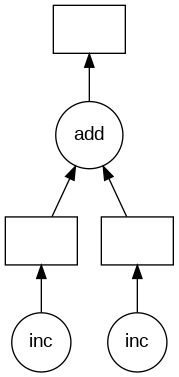

In [ ]:
# visualize computation graph
%%z.visualize()

In [ ]:
%%time
z.compute()

CPU times: user 12.3 ms, sys: 1.16 ms, total: 13.5 ms
Wall time: 2 s


5

## 3. Spark

Let's now look at using Apache Spark, connected to a real Amazon EMR-hosted cluster.

###This part will be demo only, you will not be able to run it unless you have set up your own cluster and connect to it.###

We have to set up "spark magics" that enable `%%spark` commands.  Your code needs to run on the Spark cluster, and every cell needs to be preceded with `%%spark`.

In [ ]:
!apt install libkrb5-dev
!pip install sparkmagic

In [ ]:
%load_ext sparkmagic.magics

[link text](https://)### 3.1 Connecting to the cluster

Here is where you give a *session name* and the address of your Amazon Spark cluster coordinator.

In [ ]:
%spark add -s my_session_1 -l python -u http://ec2-100-26-161-176.compute-1.amazonaws.com -a cis545-livy -p password -t Basic_Access
# The above can connect to an EMR node running Spark + Livy, assuming the firewall is set to let anyone in

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1664302273938_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


Your Python code will be running not in Colab, but on the cluster...  So all imports, files, etc. are separate!

This means you need to re-import packages.

More frustratingly, pip install doesn't work on the cluster.  You need to preconfigure the cluster with whatever packages you need!

In [ ]:
%%spark
import json
import requests


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's load some data.  Note this can't be from our local machine or from Colab itself!

In [ ]:
%%spark

# 10K records from linkedin
linked_in = requests.get('https://storage.googleapis.com/penn-cis5450/linkedin_small.json')

my_list = [json.loads(line) for line in linked_in.iter_lines()]
len(my_list)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

100000

### 3.2. Creating a Spark dataframe

In [ ]:
%%spark

# Spark requires that we define a schema for the LinkedIn data...
from pyspark.sql.types import StringType, StructField, StructType, ArrayType, MapType
schema = StructType([
        StructField("_id", StringType(), True),
        StructField("name", MapType(StringType(), StringType()), True),
        StructField("locality", StringType(), True),
        StructField("skills", ArrayType(StringType()), True),
        StructField("industry", StringType(), True),
        StructField("summary", StringType(), True),
        StructField("url", StringType(), True),
        StructField("also_view", ArrayType(\
                    StructType([\
                      StructField("url", StringType(), True),\
                      StructField("id", StringType(), True)])\
                    ), True)\
         ])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Load the remote data as a list of dictionaries
linked_df = sqlContext.createDataFrame(my_list, schema).\
  repartition('_id')
linked_df.createOrReplaceTempView('linked_in')
linked_df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 _id|                name|            locality|              skills|            industry|             summary|                 url|           also_view|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  in-aarthigandhiraj|{given_name -> Aa...|Dallas/Fort Worth...|                null|  Telecommunications|As a Telecommunic...|http://www.linked...|[{http://www.link...|
|in-aashishjoshi14...|{given_name -> Aa...|    Pune Area, India|[Datastage, Terad...|Information Techn...|Teradata 12 Certi...|http://in.linkedi...|[{http://in.linke...|
|    in-abbeysprofile|{given_name -> Ab...|Miami/Fort Lauder...|                null|Information Techn...|                null|http://www.linked...|[{

In [ ]:
%%spark

sqlContext.sql('select * from linked_in').show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 _id|                name|            locality|              skills|            industry|             summary|                 url|           also_view|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  in-aarthigandhiraj|{given_name -> Aa...|Dallas/Fort Worth...|                null|  Telecommunications|As a Telecommunic...|http://www.linked...|[{http://www.link...|
|in-aashishjoshi14...|{given_name -> Aa...|    Pune Area, India|[Datastage, Terad...|Information Techn...|Teradata 12 Certi...|http://in.linkedi...|[{http://in.linke...|
|    in-abbeysprofile|{given_name -> Ab...|Miami/Fort Lauder...|                null|Information Techn...|                null|http://www.linked...|[{

### 3.3. Nested content and explode in Spark

In [ ]:
%%spark
sqlContext.sql('select _id, name.given_name, name.family_name, explode(skills) from linked_in').show(5)

### 3.4 Grouping and counting

In [ ]:
%%spark
## Count how many users are in a given locality, and show the first 5
sqlContext.sql('select locality, count(*) from linked_in group by locality').show(5)


### 3.5 Queries and grouping

In [ ]:
%%spark
## TODO 5: How many "Lauras" are in the data?  Show the first 5.
sqlContext.sql('select count(*) from linked_in where name.given_name=\'Laura\' ').show(5)